In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
# Downloading data for Lemmitization process
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Importing the Dataset 

In [2]:
df = pd.read_csv(r"F:\anu\infosys_internship\Emotions_training.csv")

df.head(2)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0


# Data Preprocessing

In [3]:
#Converting into lower case
df['text']=df['text'].str.lower()

#Removing links
df['text'] = df['text'].fillna('')

df['text'] = df['text'].apply(lambda x: re.sub(r"http\S+", "", x))

#Remove next lines
df['text'] = df['text'].str.replace('\n',' ')

#Removing words containing numbers
pattern = r'\b\w*\d\w*\b'

def remove_words_containing_numbers(text):
    return re.sub(pattern, '', text)

df['text'] = df['text'].apply(remove_words_containing_numbers)

#Removing extra spaces
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))

#Removing special characters
df['text'] = df['text'].apply(lambda x: re.sub('[^A-Za-z0-9]+', '', x))

#Removing stop words
stop_words = set(stopwords.words('english'))
# applying the process of removing the stop words using function
def removing_stopwords(text):
    tokens = word_tokenize(text)
    text = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(text)

df['text'] = df['text'].apply(removing_stopwords)

#Stemming process
stemmer = PorterStemmer()
# applying the process

def stemming_process(word):
    return stemmer.stem(word)

#calling the function
df['text'] = df['text'].apply(lambda x: ' '.join(stemming_process(word) for word in x.split()))

#Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Bar Graph representation 

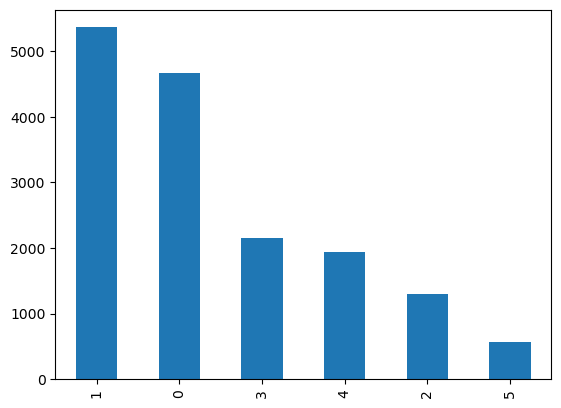

In [4]:
counts = df['label'].value_counts()

# plot the counts as a bar graph
counts.plot(kind='bar')

# show the plot
plt.show()

# Vectorizing the text

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text_data(data, column):
    """Vectorize the text data in a particular column of a dataset."""
    vectorizer = TfidfVectorizer() 
    vectors = vectorizer.fit_transform(data[column])
    return vectors

#'df' is our DataFrame and 'text' is the column you want to vectorize
vectors = vectorize_text_data(df, 'text')

# print the shape of the TF-IDF matrix
print("n_samples: %d, n_features: %d" % vectors.shape)

n_samples: 16000, n_features: 15968


# Spliting the dataset into 3 parts 

    1.Training Data                                                                                                                  2.Testing Data                                                                                                                  3.Validation Data                                                                                                                In which the training data contains 70% of data ,testing data contains 20% and 10% of data is validation data 

In [6]:
from sklearn.model_selection import train_test_split

# `df` is our dataset and `label` are the target variables

# Divide the data into 70% training and 30% remaining data
train_data, remaining_data = train_test_split(df, test_size=0.3, random_state=42)

# Divide the remaining 30% data into 20% testing and 10% validation data
test_data, validation_data = train_test_split(remaining_data, test_size=0.33, random_state=42)

# Verify the sizes of the splits
print("Training data size:", len(train_data))
print("Testing data size:", len(test_data))
print("Validation data size:", len(validation_data))

Training data size: 11200
Testing data size: 3216
Validation data size: 1584
